# Grain Size Quantification and Mapping of Pebbles (Soloy et al. 2020)

This code allows the detection and measurement of the non-overlapping clasts visible on scales terrestrial photographs and on georeferenced UAV derived ortho-images, as described by Soloy et al. (2020).

The instance segmentation model named Mask R-CNN trained and use for this purpose was first developped by He et al. (2017).
The present code is based on the Matterport's implementation (https://github.com/matterport/Mask_RCNN)

- Soloy, A.; Turki, I.; Fournier, M.; Costa, S.; Peuziat, B.; Lecoq, N. A Deep Learning-Based Method for Quantifying and Mapping the Grain Size on Pebble Beaches. Remote Sens. 2020, 12, 3659.
- He, K.; Gkioxari, G.; Dollar, P.; Girshick, R. Mask R-CNN. In Proceedings of the 2017 IEEE International Conference on Computer Vision (ICCV), Venice, Italy, 22–29 October 2017; pp. 2980–2988.

## Configurations

In [8]:
!pip install -r requirements_pip.txt

  Using cached Keras-2.0.8-py2.py3-none-any.whl (276 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [1]:
import os
import numpy as np
from os import listdir
from os.path import isfile, join
from functions import clasts_rasterize
from functions import clasts_detection
import pandas as pd

# Root directory of the project
RT_DIR = os.getcwd()

d:\Anaconda\envs\CSM\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\Anaconda\envs\CSM\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\Anaconda\envs\CSM\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\Anaconda\envs\CSM\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWarning: Passing (type, 1) or 

## Load Paths to data

In [2]:
# Paths to directories of images to be measured
datadirpath = os.path.join(RT_DIR, "datasets")
terrestrialdirpath = os.path.join(datadirpath, "terrestrial")
UAVdirpath = os.path.join(datadirpath, "UAV")
resultsdirpath = os.path.join(RT_DIR, 'results')


## Run Detection & Measurements

### On terrestrial scaled photographs

In [3]:
# List of image files to be analyzed 
# TO DO: Adapt the file extension to the appropriate type (jpg, tif, png, etc.) or erase the condition from "&"

filenames = [f for f in listdir(terrestrialdirpath) if isfile(join(terrestrialdirpath, f)) & (f[-4:]=='.jpg')]
numboffiles=np.shape(filenames)

for i in range(0, numboffiles[0]):
    print('['+str(i)+'] '+filenames[i])
    
print(filenames)

[0] penncove_ph_msl.jpg
['penncove_ph_msl.jpg']


In [4]:
# Arguments list
mode = "terrestrial"
devicemode = "CPU"    #Chose between GPU and CPU depending on your configuration. (see https://github.com/matterport/Mask_RCNN)
devicenumber = 0      # Default value is 0 (i.e. first device in the list)
imlist = filenames
imdirectory = terrestrialdirpath
resolution = 0.0005

print(filenames)
print(np.shape(imlist))

['penncove_ph_msl.jpg']
(1,)


Loading weights  c:\MLGeo2022_Workspace\ESS590_final_project\clast-size-mapping\clast-size-mapping\model_weights\mask_rcnn_clasts.h5
Hello
['penncove_ph_msl.jpg']


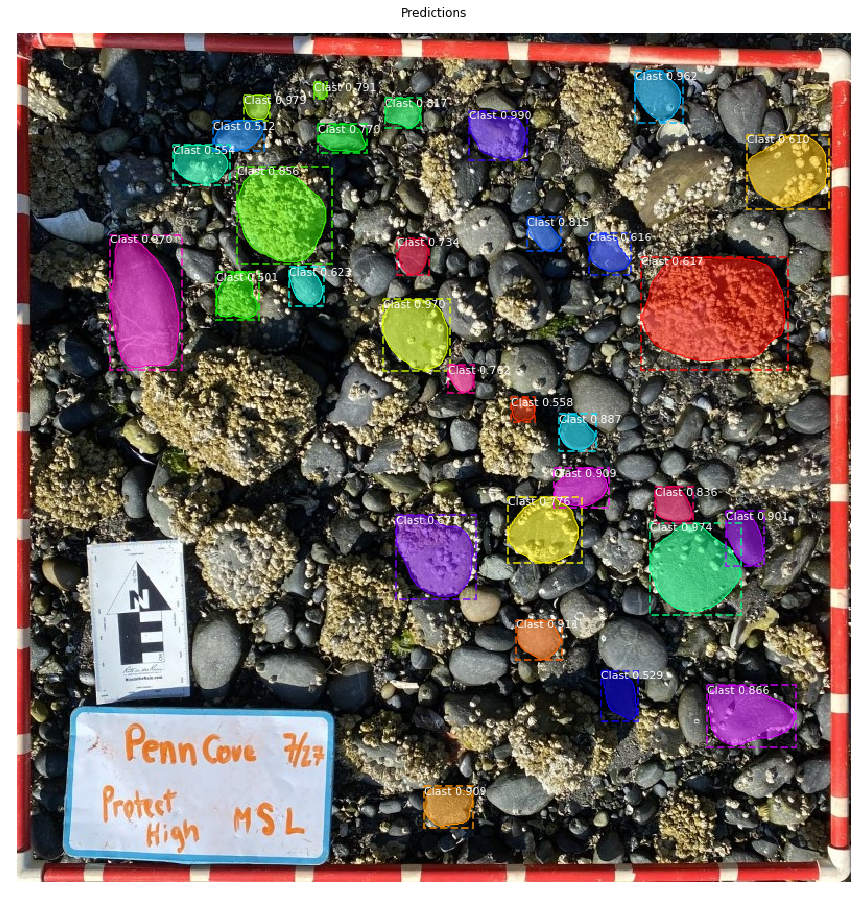

: 

: 

In [5]:
#Detection & measurement operation
clasts = clasts_detection.clasts_detect(imlist = imlist,
                                        imdirectory = imdirectory,
                                        mode = mode, 
                                        resolution = resolution, 
                                        plot = True, 
                                        saveplot = True, 
                                        saveresults = True)

# Detects and measure the clasts on a scaled image that can be either terrestrial (i.e. photograph of known resolution) or UAV derived (georeferenced ortho-image)
# mode: "terrestrial", "UAV"
# resolution: resolution of a terrestrial image (default = 0.001 m/pixel)
# imdirectory: directory where image(s) to be processed are stored all toguether
# imlist: file name list of the images to be processed
# metric_cropsize: Window size used for croping a UAV image into tiles (default = 1m)
# plot: (boolean) Display detections and histograms
# saveplot: (boolean) Save the detection and histogram figures
# saveresults: (boolean) Save the clast sizes into a CSV file
# devicemode: "gpu", "cpu" (default = "gpu") (see tesorflow-gpu documentation)
# devicenumber: id number of the device to be used (default = 0)

### On UAV-derived geotiff ortho-images

In [10]:
# List of image raster files to be analyzed
# Files must be provided in a tif format using UTM or any other projected coordinate system allowing for metric measurements.

filenames = [f for f in listdir(UAVdirpath) if isfile(join(UAVdirpath, f)) & (f[-4:]=='.tif')]
numboffiles = np.shape(filenames)

for i in range(0, numboffiles[0]):
    print('[' + str(i) + '] ' + filenames[i])

print(filenames)

[0] reprojected_subset.tif
['reprojected_subset.tif']
(1,)


In [8]:
# Arguments list
mode = "UAV"
devicemode = "CPU"    # Chose between GPU and CPU depending on your configuration. (see https://github.com/matterport/Mask_RCNN)
devicenumber = 0
metric_cropsize = 1   # Larger values compute faster but are likely to provide lower numbers of detections.
                      # 1 m is an empirically proven good value for clast of pebble size.
    
imlist = filenames#[0:3]
imdirectory = UAVdirpath

kstart = 1
ksaveint = 120

#Detection & measurement operation
clasts_list = clasts_detection.clasts_detect(imlist = imlist,
                                             imdirectory =imdirectory,
                                             mode = mode, 
                                             metric_cropsize = metric_cropsize, 
                                             plot = True, 
                                             saveplot = True, 
                                             saveresults = True, 
                                             devicemode = devicemode, 
                                             devicenumber = devicenumber, 
                                             kstart = kstart, 
                                             ksaveint = ksaveint)

# Detects and measures the clasts on a scaled image that can be either terrestrial (i.e. photograph of known resolution) or UAV derived (georeferenced ortho-image)
# mode: "terrestrial", "UAV"
# resolution: resolution of a terrestrial image (default = 0.001 m/pixel)
# imdirectory: directory where image(s) to be processed are stored all toguether
# imlist: file name list of the images to be processed
# metric_cropsize: Window size used for croping a UAV image into tiles (default = 1m)
# plot: (boolean) Display detections and histograms
# saveplot: (boolean) Save the detection and histogram figures
# saveresults: (boolean) Save the clast sizes into a CSV file
# devicemode: "gpu", "cpu" (default = "gpu") (see tesorflow-gpu documentation)
# devicenumber: id number of the device to be used (default = 0)
# kstart: Starting itteration step, (in case of resuming a previously stopped processing)(default = 0)
# ksaveint: Intervalle step between 2 checkpoint saving (default = 1%)

Loading weights  c:\MLGeo2022_Workspace\ESS590_final_project\clast-size-mapping\clast-size-mapping\model_weights\mask_rcnn_clasts.h5
List of checkpoint k: []
c:\MLGeo2022_Workspace\ESS590_final_project\clast-size-mapping\clast-size-mapping\datasets\UAV\reprojected_subset_window_size=1m_individual_clast_values.csv


## Post-Processing Rasterization

In [8]:
ext = '_windows=1&2.5m_cropped_A_bottom_top_layer.csv'
filenames = [f for f in listdir(datadirpath) if isfile(join(datadirpath, f)) & (f[-len(ext):]==ext)]
numboffiles=np.shape(filenames)[0]

fields = ["Equivalent_diameter", "Orientation", "Clast_circularity", "Clast_elongation"]
numboffields = np.shape(fields)[0]
parameters = ["sorting", "Average", "std"]
numbofparameters = np.shape(parameters)[0]

print(filenames)

[]


In [9]:
for i in range(0,numboffiles):
    for j in range(0,numboffields):
        for m in range(0,numbofparameters):

            # Paths to the different files required for rasterization
            ClastImageFilePath = os.path.join(UAVdirpath, filenames[i][0:-len(ext)]+'.tif')
            ClastFileName = filenames[i]
            ClastSizeListCSVFilePath = os.path.join(datadirpath, ClastFileName)
            
            # Arguments list
            field = fields[j]
            parameter = parameters[m]
            cellsize = 1
            percentile = 0.5
            plot = False
            figuresize = (15,20)
            T = 6.5
            if parameter == 'quantile':
                paramname = 'D'+str(int(percentile*100))
            else:
                paramname = parameter
            RasterFileWritingPath = os.path.join(resultsdirpath, ClastFileName[:-4]+'_field='+field+'_parameter='+paramname+'_cellsize='+str(cellsize)+'m.tif')
            
            #Rasterization operation
            clasts_raster = clasts_rasterize.clasts_rasterize(ClastImageFilePath, 
                                                              ClastSizeListCSVFilePath, 
                                                              RasterFileWritingPath, 
                                                              field, 
                                                              parameter, 
                                                              cellsize, 
                                                              percentile, 
                                                              plot, 
                                                              figuresize,
                                                              T)
        
# Converts the clast information from vector type to raster type.
# ClastImageFilePath: Path of the geotiff file used to realize the clast detection and measurement
# ClastSizeListCSVFilePath: Path of the CSV file containing the list of previously detected and measured clasts
# RasterFileWritingPath: Path to be used for writing the raster produced by the present function
# field: field (i.e. clast dimension) to be considered for computation (default = "Clast_length"):
#     - Clast_length
#     - Clast_width
#     - Ellipse_major_axis
#     - Ellipse_minor_axis
#     - Equivalent_diameter
#     - Score
#     - Orientation
#     - Surface_area
#     - Clast_elongation
#     - Ellipse_elongation
#     - Clast_circularity
#     - Ellipse_circularity
#     - Van_Rijn_dimensionless_diameter:              Dimensionless grain size calculated on the equivalent diameter #Van Rijn (1993)
#     - Soulsby_critical_shields:                     Empirical critical Shields parameter calculated on the equivalent diameter #Soulsby (1997)
#     - Shields_critical_shear_stress:                Empirical shear stress calculated on the equivalent diameter #Shields (1936) 
#     - Shields_critical_shear_velocity:              Empirical shear velocity calculated on the equivalent diameter #Shields (1936) 
#     - Shields_critical_grain_reynolds_number:       Empirical grain Reynold's number calculated on the equivalent diameter #Shields (1936) 
#     - Hjulstrom_deposition_velocity:                Empirical current velocity (m/s) related to the clast deposition according to Hjulström's diagram #DOI: 10.1115/OMAE2013-10524
#     - Hjulstrom_erosion_velocity:                   Empirical current velocity (m/s) required in order to mobilize the clast according to Hjulström's diagram #DOI: 10.1115/OMAE2013-10524
#     - Leroux_wave_orbital_velocity:                 Empirical wave orbital velocity (m/s) as a function of the wave period T required to mobilize the clast according to Le Roux's formula #DOI: 10.1016/S0037-0738(01)00105-1
# parameter: Parameter to be computed for each cell: 
#     - "quantile": returns the quantile valued for the threshold specified by the "percentile" keyword 
#     - "density": returns the density of objects per cell size unit
#     - "average": returns the average value for each cell
#     - "std": returns the standard deviation for each cell
#     - "kurtosis": returns the kurtosis size for each cell
#     - "skewness": returns the skewness value for each cell
#     - "sorting": returns the sorting value for each cell
#     - "distribution": returns the 100 quantile values for each cell
# cellsize: Wanted output raster cell size (same unit as the geotiff file used to realize the clast detection and measurement
# percentile: Percentile to be used for computing the quantile of each cell (default = 0.5, i.e. median)
# plot: Switch for displaying the produced maps (default = True)
# figuresize: Size of the displayed figure (default = (10,10))
# T: Wave period for estimating the wave orbital velocity of Le roux (default = 10)